In [6]:
#Data Source : https://www.kaggle.com/gpreda/covid-world-vaccination-progress
#!pip install countrygroups

<br><br><center><h1 style="font-size:2em;color:#2467C0">EU-Impfentwicklung</h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="https://www.iamexpat.de/sites/default/files/styles/article--full/public/coronavirus-vaccine_1_0.jpg?itok=WMACIAJs" align="middle" style="width:550px;height:360px;"/></td>
<td>
Die Datensatz ist von <a href="https://www.kaggle.com">Kaggle</a>.   <a href=" https://www.kaggle.com/gpreda/covid-world-vaccination-progress">Country_vaccinations</a> beschreibt die weltweite Impfentwicklung.
<td/>
<br>
</tr>
</table>

In [385]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Datensatz einlesen
url = 'C:/Users/Akademie/Desktop/data_externe/country_vaccination DataSet/country_vaccinations.csv'
data = pd.read_csv(url)
data



,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,Wales,NaN,2021-02-11,719954.0,715944.0,4010.0,32062.0,27897.0,22.83,22.71,0.13,8848.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3308,Wales,NaN,2021-02-12,753669.0,749445.0,4224.0,33715.0,27743.0,23.90,23.77,0.13,8799.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3309,Wales,NaN,2021-02-13,776224.0,771651.0,4573.0,22555.0,26285.0,24.62,24.47,0.15,8337.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3310,Wales,NaN,2021-02-14,790211.0,784809.0,5402.0,13987.0,26206.0,25.06,24.89,0.17,8312.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


## Daten analysieren

In [386]:
#Kopie vom Datensatz erstellen
df = data.copy()
df.shape

(3312, 15)

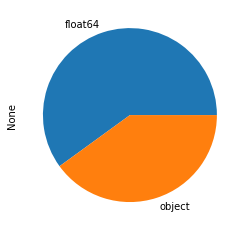

In [387]:
# Visualisierung des Datentyps
df.dtypes.value_counts().plot.pie()

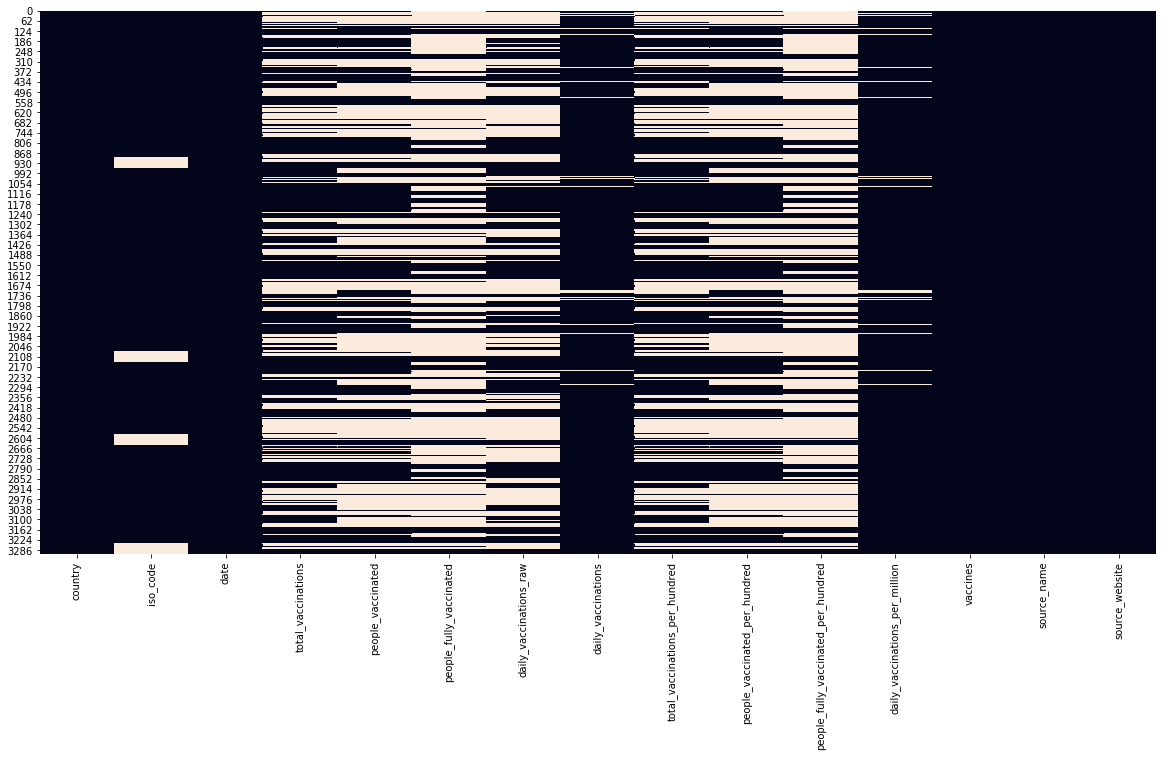

In [388]:
# Die Nullstellen in der df darstellen
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar = False)

In [ ]:
# ------> to do fehlende iso_code auffüllen

In [389]:
# Die Nullstellen in % ausrechnen
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)


country                                0.000000
date                                   0.000000
vaccines                               0.000000
source_name                            0.000000
source_website                         0.000000
daily_vaccinations                     0.038043
daily_vaccinations_per_million         0.038043
iso_code                               0.078502
total_vaccinations                     0.352355
total_vaccinations_per_hundred         0.352355
daily_vaccinations_raw                 0.461353
people_vaccinated                      0.464372
people_vaccinated_per_hundred          0.464372
people_fully_vaccinated                0.656703
people_fully_vaccinated_per_hundred    0.656703
dtype: float64

In [390]:
# Liste alle Länder vom df aufstellen
df['country'].unique()

array(['Albania', 'Algeria', 'Andorra', 'Anguilla', 'Argentina',
       'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belgium',
       'Bermuda', 'Bolivia', 'Brazil', 'Bulgaria', 'Cambodia', 'Canada',
       'Cayman Islands', 'Chile', 'China', 'Costa Rica', 'Croatia',
       'Cyprus', 'Czechia', 'Denmark', 'Ecuador', 'Egypt', 'England',
       'Estonia', 'Faeroe Islands', 'Finland', 'France', 'Germany',
       'Gibraltar', 'Greece', 'Greenland', 'Guernsey', 'Guyana',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Ireland',
       'Isle of Man', 'Israel', 'Italy', 'Jersey', 'Kuwait', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Monaco', 'Morocco', 'Myanmar', 'Nepal',
       'Netherlands', 'Northern Cyprus', 'Northern Ireland', 'Norway',
       'Oman', 'Pakistan', 'Panama', 'Peru', 'Poland', 'Portugal',
       'Qatar', 'Romania', 'Russia', 'Saint Helena', 'Saudi Arabia',
       'Scotland', 'Serbia', 'Se

In [391]:
# ------> to do Eine Zusammenfassung des df erstellen (Summary)


In [457]:
# die Liste der Impfstoffe aus dem df erstellen

pre_vaccin_df = df['vaccines'].str.split(',', expand = True)
#np.unique(np.pre_vaccin_df.values.ravel())
vaccin_List = filter(None,pre_vaccin_df.values.ravel())
vaccin_List = np.unique(np.char.strip([ x for x in pre_vaccin_df.values.ravel() if  x is not None ]).reshape(-1,))
len(vaccin_List)


#for i in vaccin_List:
    #print(i)

vaccin_List




array(['Covaxin', 'Moderna', 'Oxford/AstraZeneca', 'Pfizer/BioNTech',
       'Sinopharm/Beijing', 'Sinopharm/Wuhan', 'Sinovac', 'Sputnik V'],
      dtype='<U19')

In [458]:
#Liste der Länder die Oxford/AstraZeneca benutzt haben
np.array(df[['country']][df['vaccines'].str.contains(vaccin_List[1])]['country'].unique())

array(['Austria', 'Belgium', 'Bulgaria', 'Canada', 'Czechia', 'Denmark',
       'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Iceland',
       'Ireland', 'Israel', 'Italy', 'Latvia', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'Romania', 'Spain', 'Switzerland', 'United States'],
      dtype=object)

In [459]:
# Df , der zeigt in welchen Ländern die Impfstoffe verimpft worden sind, erstellen

country_vaccin = [df[['country']][df['vaccines'].str.contains(i)]['country'].unique() for i in vaccin_List]
#print(len(country_vaccin),len(vaccin_List))
lst = [vaccin_List,country_vaccin]
dfv = pd.DataFrame(lst).transpose().rename(columns={0: 'Vaccin' , 1:'countries'})
#dfv['total_coutries'] = 
dfv['total_country'] = dfv['countries'].str.len()
dfv.sort_values(by=['total_country'], inplace=True, ascending=False)
dfv



,Vaccin,countries,total_country
3,Pfizer/BioNTech,"[Albania, Andorra, Austria, Bahrain, Belgium, ...",65
2,Oxford/AstraZeneca,"[Anguilla, Austria, Azerbaijan, Bangladesh, Be...",46
1,Moderna,"[Austria, Belgium, Bulgaria, Canada, Czechia, ...",27
4,Sinopharm/Beijing,"[Bahrain, Cambodia, China, Egypt, Morocco, Pak...",10
7,Sputnik V,"[Algeria, Argentina, Azerbaijan, Bolivia, Iran...",9
6,Sinovac,"[Brazil, Chile, China, Indonesia, Northern Cyp...",6
5,Sinopharm/Wuhan,"[China, United Arab Emirates]",2
0,Covaxin,[India],1


In [460]:
# Df , der zeigt in welchen Ländern die Impfstoffe verimpft worden sind, erstellen mit plotly

#np.unique(df.groupby('vaccines')['country'].apply(list)[1])
import plotly.graph_objects as go

values = [vaccin_List, #1st col
  country_vaccin,dfv['total_country']]


fig = go.Figure(data=[go.Table(
  columnorder = [1,2,3],
  columnwidth = [200,400],
  header = dict(
    values = [['<b>Impfung</b><br>'],
                  ['<b>Länder</b>'],['<b>Anzahl der Länder</b>']],
    line_color='darkslategray',
    fill_color='royalblue',
    align=['left','center'],
    font=dict(color='white', size=15),
    height=40
  ),
  cells=dict(
    values=values,
    line_color='darkslategray',
    fill=dict(color=['paleturquoise', 'white']),
    align=['left', 'center'],
    font_size=12,
    height=30)
    )
])
fig.show()

In [481]:
#!pip install pygal_maps_world
dfv['countries']





3    [Albania, Andorra, Austria, Bahrain, Belgium, ...
2    [Anguilla, Austria, Azerbaijan, Bangladesh, Be...
1    [Austria, Belgium, Bulgaria, Canada, Czechia, ...
4    [Bahrain, Cambodia, China, Egypt, Morocco, Pak...
7    [Algeria, Argentina, Azerbaijan, Bolivia, Iran...
6    [Brazil, Chile, China, Indonesia, Northern Cyp...
5                        [China, United Arab Emirates]
0                                              [India]
Name: countries, dtype: object

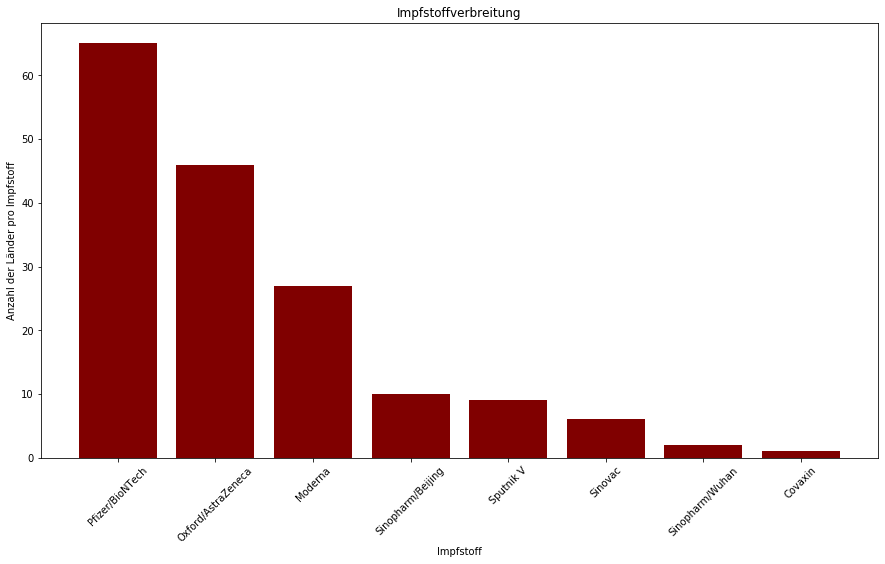

In [498]:
# barplot für die Impfstoffverbreitung

fig = plt.figure(figsize = (15, 8)) 
  
# creating the bar plot 
plt.bar(dfv['Vaccin'], dfv['total_country'], color ='maroon',  
        width = 0.8) 
  
plt.xlabel("Impfstoff") 
plt.ylabel("Anzahl der Länder pro Impfstoff") 
plt.title("Impfstoffverbreitung") 
plt.xticks(rotation=45)
plt.show() 
#Pfizer/BionTech ist der am meinsten verwendete Impfstoff weltweit

In [500]:
#Anzahl der geimpften Menschen in jedem Land

data[data['country'] == 'Albania']['total_vaccinations'].max()

1127.0

In [502]:
df_cp = pd.DataFrame(person_vaccinated,countries_v,columns={'Zahl der geimpften Menschen'})
df_cp.sort_values(by=['Zahl der geimpften Menschen'], inplace=True, ascending=False)
df_cp[:20]['Zahl der geimpften Menschen']

United States           55220364.0
China                   40520000.0
United Kingdom          16122272.0
England                 13575245.0
India                    8999230.0
Israel                   6758861.0
Brazil                   5609937.0
United Arab Emirates     5198725.0
Turkey                   4630784.0
Germany                  4284554.0
Russia                   3900000.0
Italy                    3122631.0
France                   3014973.0
Spain                    2624512.0
Chile                    2375725.0
Poland                   2159146.0
Morocco                  1904169.0
Indonesia                1658110.0
Bangladesh               1359613.0
Canada                   1306784.0
Name: Zahl der geimpften Menschen, dtype: float64

91 91


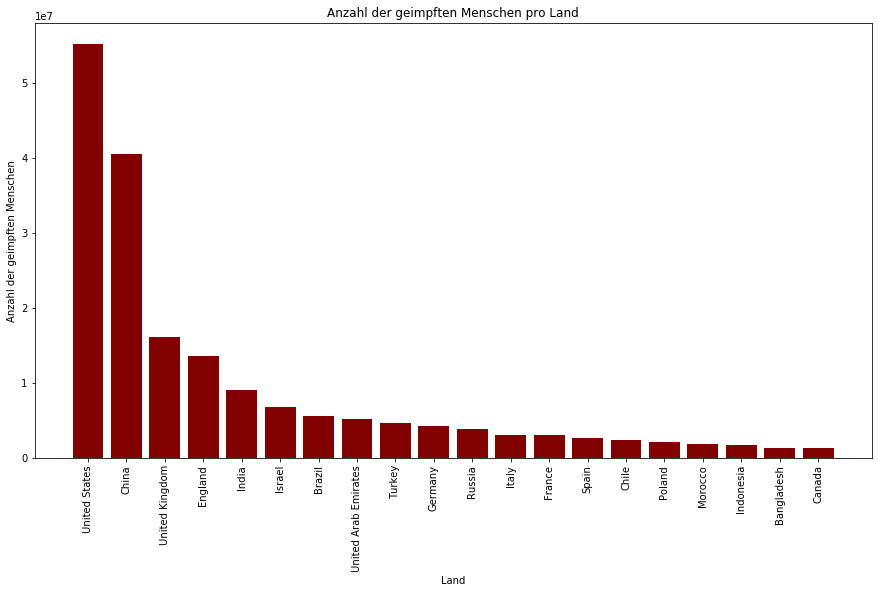

In [503]:


countries_v = data['country'].unique()
person_vaccinated = []
for country in countries_v:
    person_vaccinated.append(data[data['country'] == country]['total_vaccinations'].max())

#data_2 = data.groupby('country')['total_vaccinations'].max() # Zweite lösung


print(len(person_vaccinated),len(countries_v))


fig = plt.figure(figsize = (15, 8)) 
plt.bar(df_cp[:20].index,df_cp[:20]['Zahl der geimpften Menschen'], color ='maroon',  
        width = 0.8) 
  
plt.xlabel("Land") 
plt.ylabel("Anzahl der geimpften Menschen") 
plt.title("Anzahl der geimpften Menschen pro Land") 
plt.xticks(rotation=90)
plt.show() 
    

In [465]:
data_2 = data.groupby('country')['total_vaccinations'].max()
data_2


country
Albania                         1127.0
Algeria                           30.0
Andorra                         1291.0
Anguilla                        1341.0
Argentina                     611169.0
                               ...    
Turks and Caicos Islands        6433.0
United Arab Emirates         5198725.0
United Kingdom              16122272.0
United States               55220364.0
Wales                         803178.0
Name: total_vaccinations, Length: 91, dtype: float64

## Impfentwicklung in der EU

In [466]:
data['country'].unique()

array(['Albania', 'Algeria', 'Andorra', 'Anguilla', 'Argentina',
       'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belgium',
       'Bermuda', 'Bolivia', 'Brazil', 'Bulgaria', 'Cambodia', 'Canada',
       'Cayman Islands', 'Chile', 'China', 'Costa Rica', 'Croatia',
       'Cyprus', 'Czechia', 'Denmark', 'Ecuador', 'Egypt', 'England',
       'Estonia', 'Faeroe Islands', 'Finland', 'France', 'Germany',
       'Gibraltar', 'Greece', 'Greenland', 'Guernsey', 'Guyana',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Ireland',
       'Isle of Man', 'Israel', 'Italy', 'Jersey', 'Kuwait', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Monaco', 'Morocco', 'Myanmar', 'Nepal',
       'Netherlands', 'Northern Cyprus', 'Northern Ireland', 'Norway',
       'Oman', 'Pakistan', 'Panama', 'Peru', 'Poland', 'Portugal',
       'Qatar', 'Romania', 'Russia', 'Saint Helena', 'Saudi Arabia',
       'Scotland', 'Serbia', 'Se

In [482]:
from countrygroups import EUROPEAN_UNION
euCountries = EUROPEAN_UNION.names
print(len(euCountries),EUROPEAN_UNION)

27 ['AUT', 'BEL', 'BGR', 'CYP', 'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GRC', 'HRV', 'HUN', 'IRL', 'ITA', 'LTU', 'LUX', 'LVA', 'MLT', 'NLD', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'SWE']


In [468]:
vacc_eu_Countries = data[data['country'].isin(euCountries)]
exist = vacc_eu_Countries['country'].unique()
len(exist)

27

In [469]:
## Df , der zeigt in welchen EU-Ländern die Impfstoffe verimpft worden sind, erstellen


country_vaccin_eu = [vacc_eu_Countries[['country']][vacc_eu_Countries['vaccines'].str.contains(i)]['country'].unique() for i in vaccin_List]
#print(len(country_vaccin),len(vaccin_List))
vcl = [vaccin_List,country_vaccin_eu]
df_euv = pd.DataFrame(vcl).transpose().rename(columns={0: 'Vaccin' , 1:'countries'})
#dfv['total_coutries'] = 
df_euv['total_country'] = df_euv['countries'].str.len()
df_euv.sort_values(by=['total_country'], inplace=True, ascending=False)
df_euv = df_euv.replace(0,np.nan).dropna()
df_euv


,Vaccin,countries,total_country
3,Pfizer/BioNTech,"[Austria, Belgium, Bulgaria, Croatia, Cyprus, ...",27.0
1,Moderna,"[Austria, Belgium, Bulgaria, Czechia, Denmark,...",20.0
2,Oxford/AstraZeneca,"[Austria, Belgium, Bulgaria, Czechia, Estonia,...",20.0


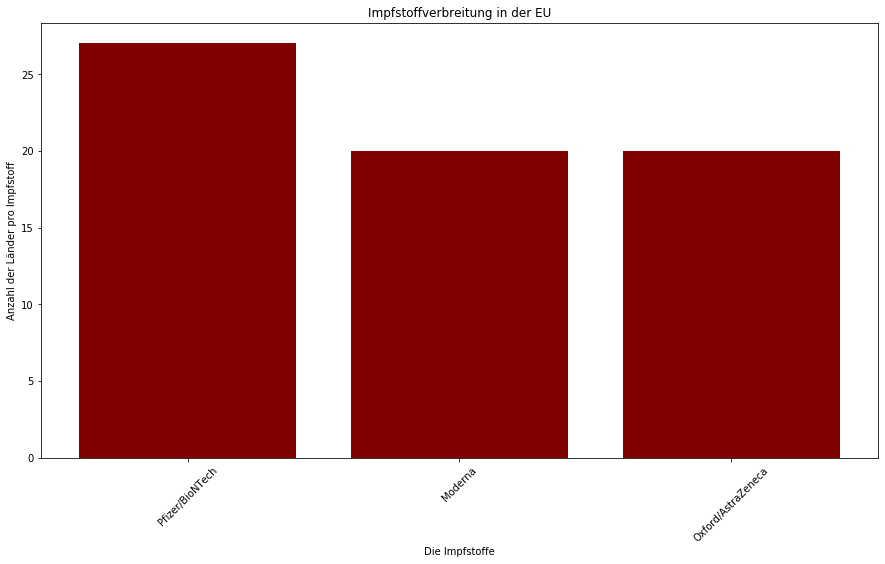

In [504]:
# barplot für die Impfstoffverbreitung in der EU 

fig = plt.figure(figsize = (15, 8)) 
  
# creating the bar plot 
plt.bar(df_euv['Vaccin'], df_euv['total_country'], color ='maroon',  
        width = 0.8) 
  
plt.xlabel("Die Impfstoffe") 
plt.ylabel("Anzahl der Länder pro Impfstoff") 
plt.title("Impfstoffverbreitung in der EU") 
plt.xticks(rotation=45)
plt.show() 

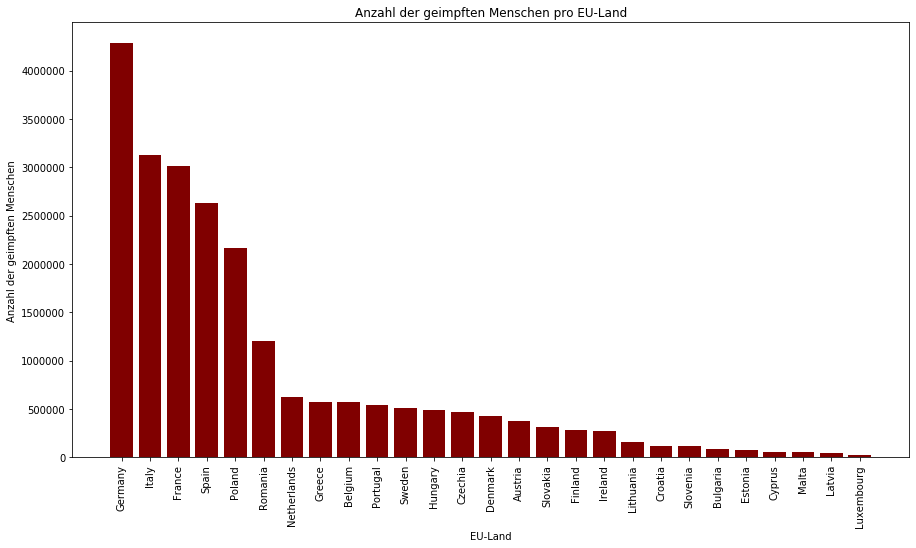

In [505]:
data_3 = vacc_eu_Countries.groupby('country')['total_vaccinations'].max().sort_values(ascending=False)

fig = plt.figure(figsize = (15, 8)) 
plt.bar(data_3.index,data_3, color ='maroon',  
        width = 0.8) 
  
plt.xlabel("EU-Land") 
plt.ylabel("Anzahl der geimpften Menschen") 
plt.title("Anzahl der geimpften Menschen pro EU-Land") 
plt.xticks(rotation=90)
plt.show() 


In [497]:
# ---> To do ..  die Ergebnisse in einer Karte zeigen (Folium? plotly?...)
#----> to do ... Die Impfprognose für die nächsten 4 Wochen (RNN? LSTM?)

In [ ]:
#